In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import wave
import librosa
import librosa.display

In [2]:
file_path = os.path.join(os.getcwd(), 'audio', 'Audio1.wav')

In [10]:
with wave.open(file_path, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_data = np.frombuffer(frames, dtype='int16')
    sampling_rate = wav_file.getframerate()
    panjang_audio_sampel = len(sound_data)
    panjang_audio_detik = panjang_audio_sampel / sampling_rate
    time_axis = np.linspace(0, panjang_audio_detik, panjang_audio_sampel)

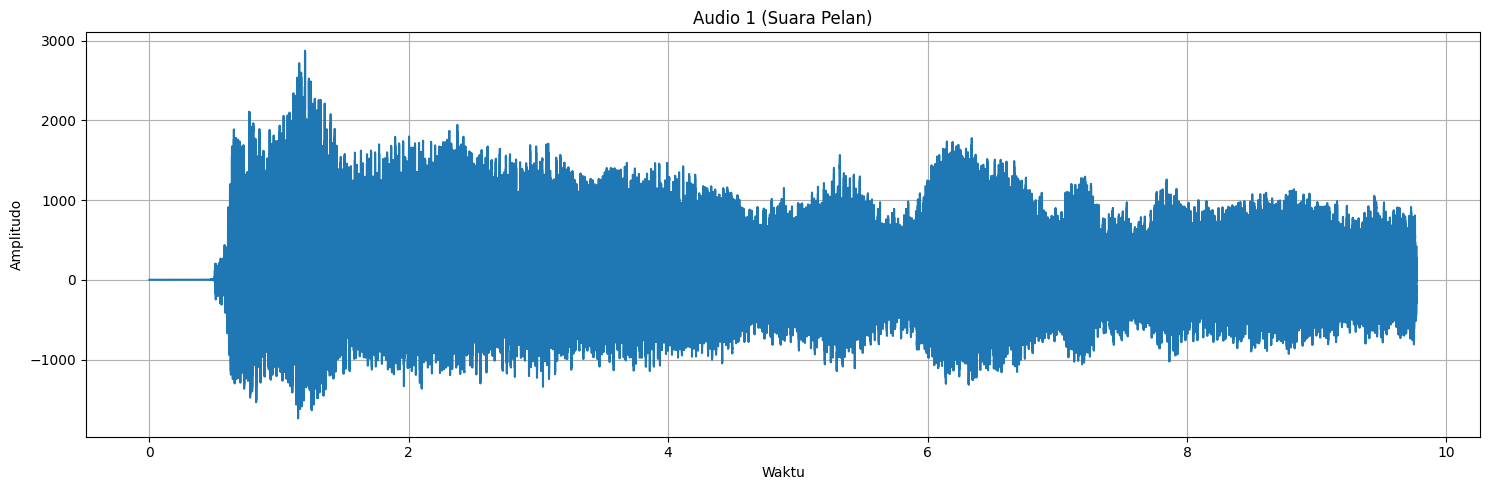

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(time_axis, sound_data)
plt.title("Audio 1 (Suara Pelan)")
plt.xlabel("Waktu")
plt.ylabel("Amplitudo")
plt.grid(True)
plt.tight_layout()
plt.show()